### Credit

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set();

In [35]:
path = './dataset_31_credit-g.csv'
credit_g = pd.read_csv(path);
# credit_g = pd.read_csv("dataset_31_credit-g.csv");
cont_feat = credit_g._get_numeric_data().columns
print("The continous features are: ", cont_feat.values)
print("After looking at the data set, I safely concluded that rest of the columns can all be classified as categorical variables.")

The continous features are:  ['duration' 'credit_amount' 'installment_commitment' 'residence_since'
 'age' 'existing_credits' 'num_dependents']
After looking at the data set, I safely concluded that rest of the columns can all be classified as categorical variables.


## Task 1.1
#### Continous Variables = 'duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits',     'num_dependents'
#### Categorical Variables = 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class'

### Task 1.2 (Visualized using both boxplots first and histograms later)

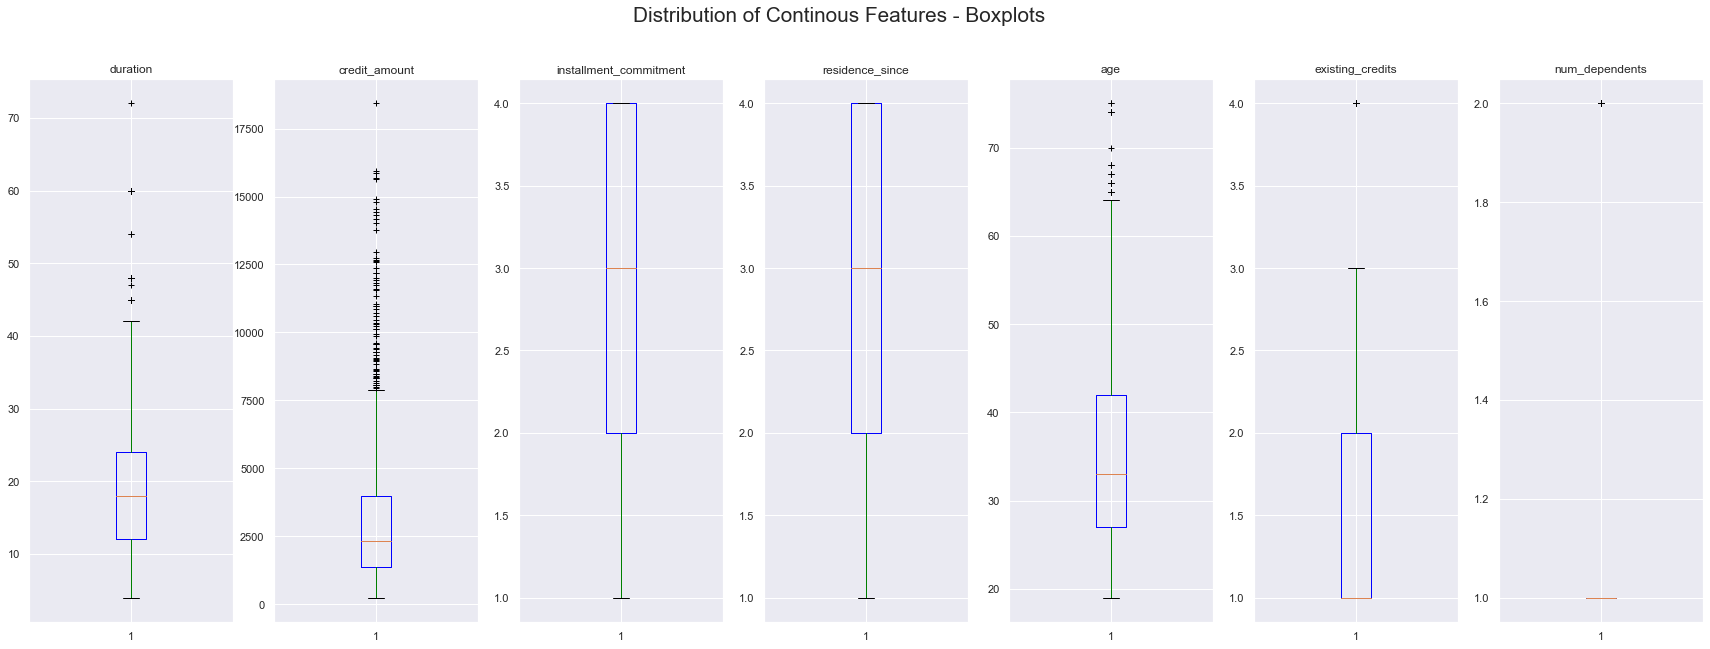

In [36]:
# Boxplots for each continous feature !
fig, axes = plt.subplots(1,7, figsize=(30,10));
ax11, ax21, ax31, ax41, ax51, ax61, ax71 = axes.ravel();
fig.suptitle('Distribution of Continous Features - Boxplots', fontsize = 'xx-large');
j = 0
for ax in axes.flatten():
    bp = ax.boxplot(credit_g[cont_feat[j]], vert = True);
    ax.title.set_text(cont_feat[j]);
    j = j+1;
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'], color='green')
    plt.setp(bp['fliers'], color='red', marker='+')    

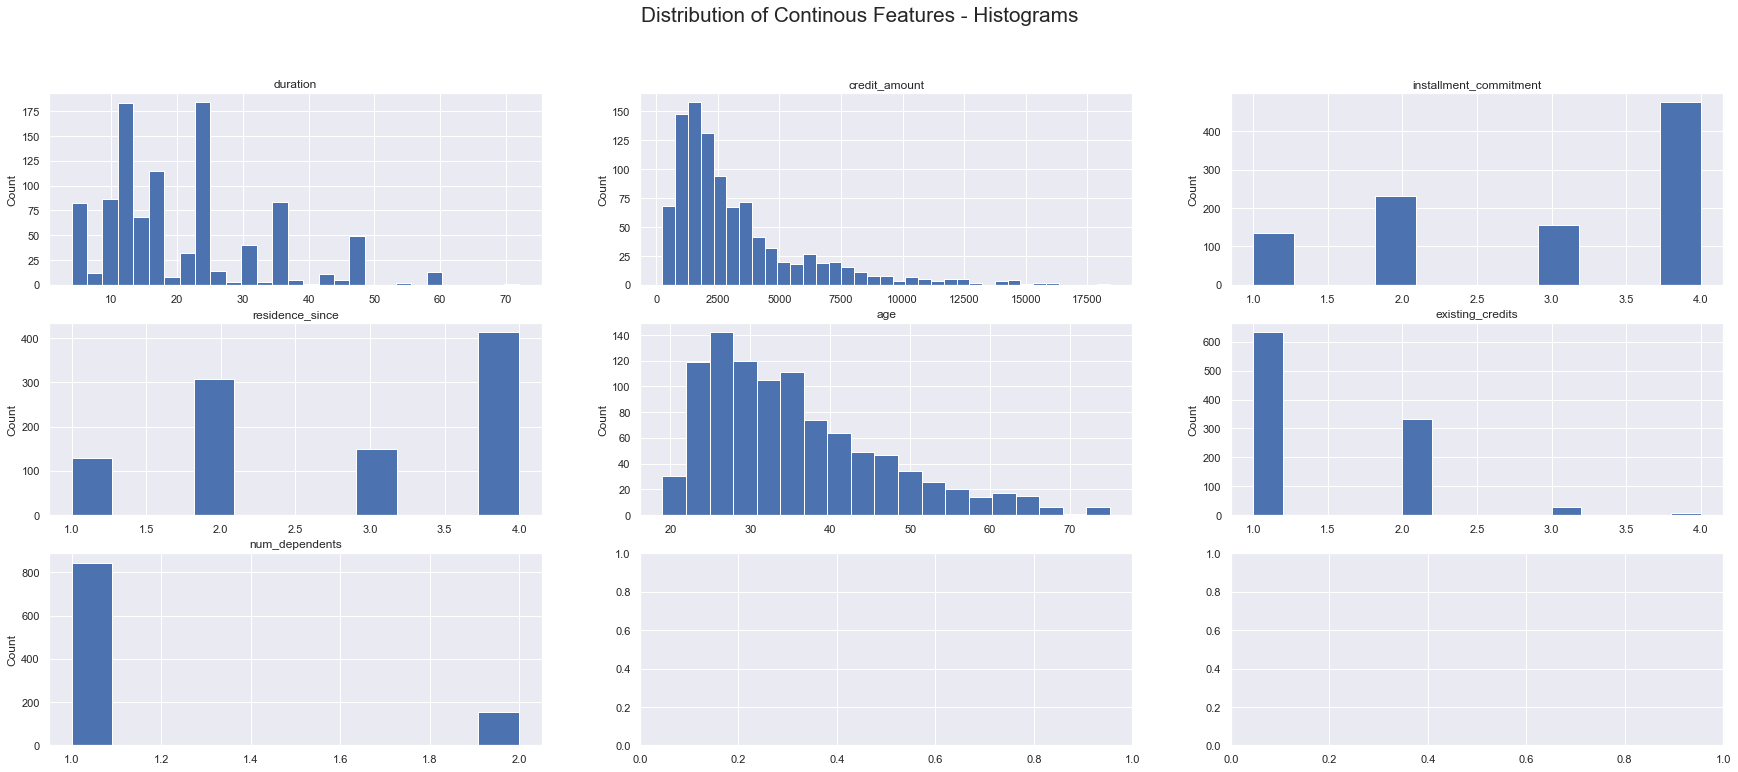

In [37]:
# Histograms for each continous feature !

fig, axes = plt.subplots(3, 3, figsize=(30,12));
ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33 = axes.ravel();

fig.suptitle('Distribution of Continous Features - Histograms', fontsize = 'xx-large');
j = 0; count = 0;
for ax in axes.flatten():
    count = count+1
    if count<8:
        ax.hist(credit_g[cont_feat[j]], bins = 'auto');
        ax.title.set_text(cont_feat[j]);
        ax.set_ylabel("Count")
        j = j+1;
    else:
        break

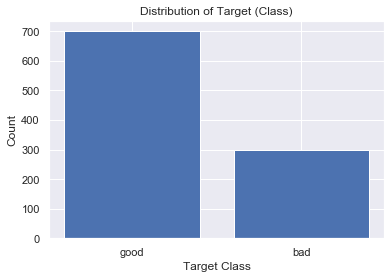

In [38]:
names = credit_g['class'].unique();
values = []
for i in names:
    values.append(credit_g[credit_g['class'] == i]['class'].count());
plt.bar(names, values)

plt.title('Distribution of Target (Class)');
plt.ylabel('Count');plt.xlabel('Target Class');

### Task 1.3

In [13]:
#Removing target variable from the dataframe.
X_credit = credit_g[credit_g.columns[~credit_g.columns.isin(['class'])]];
y_credit = credit_g[credit_g.columns[credit_g.columns.isin(['class'])]];

In [39]:
# Pending categorical variables other ways of encoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_trainval, X_test, y_trainval, y_test = train_test_split(X_credit, y_credit, random_state=1)
categorical = X_credit.dtypes == object
#Preprocessing categorical variables using get dummies function of pandas (without using pipeline)
#One Hot Encoding using column tranformer is done in Task 1.4 !!
X_encd_trainval = pd.get_dummies(X_trainval);

#Again splitting the training_validation data into training and validation sets. 
X_encd_train, X_encd_val, y_train, y_val = train_test_split(X_encd_trainval, y_trainval, random_state=3)

#Fitting logistic regression on the encoded training set of data.
clf = LogisticRegression().fit(X_encd_train, y_train)
print("Accuracy of the validation data set: ", clf.score(X_encd_val, y_val))

Accuracy of the validation data set:  0.723404255319149


### Task 1.4

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

####---- LOGISTIC Regression Fit ----####
#Evaluating CV score after encoding (but without scaling continous variables)
preprocess = make_column_transformer((OneHotEncoder(), categorical), remainder = 'passthrough')
pipe_logReg = make_pipeline(preprocess, LogisticRegression())
print("Logistic Regression CV Score(without Scaling): ", np.mean(cross_val_score(pipe_logReg, X_trainval, y_trainval)))

#Evaluating CV score after encoding (and with scaling - Standard Scaler)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical))
pipe_StdScale_logReg = make_pipeline(preprocess, LogisticRegression())
print("Logistic Regression CV Score(Standard Scaling): ", np.mean(cross_val_score(pipe_StdScale_logReg, X_trainval, y_trainval)))


#Evaluating CV score after encoding (and with scaling - Minmax Scaler)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (MinMaxScaler(), ~categorical))
pipe_MinMaxScale_logReg = make_pipeline(preprocess, LogisticRegression())
print("Logistic Regression CV Score(MinMaxScaler Scaling): ", np.mean(cross_val_score(pipe_MinMaxScale_logReg, X_trainval, y_trainval)))

#Evaluating CV score after encoding (and with scaling - Robust Scaler)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (RobustScaler(), ~categorical))
pipe_RobustScale_logReg = make_pipeline(preprocess, LogisticRegression())
print("Logistic Regression CV Score(RobustScaler Scaling): ", np.mean(cross_val_score(pipe_RobustScale_logReg, X_trainval, y_trainval)))


Logistic Regression CV Score(without Scaling):  0.7346958938009674
Logistic Regression CV Score(Standard Scaling):  0.7320238723819581
Logistic Regression CV Score(MinMaxScaler Scaling):  0.7373518936302981
Logistic Regression CV Score(RobustScaler Scaling):  0.7333625604676342


##### Inference (Task 1.4 - Log Reg) While training the model using Logistic regression, Scaling the continous variables seemed to have very little impact on the model performance. It can be seen from the above results that without scaling and with scaling (all 3 types of scaling), the CV scores are similar to the model score without scaling. Only very small increase of 1% in accuracy observed.

In [41]:
####---- Linear SVM Fit ----####
from sklearn.svm import LinearSVC

#Evaluating CV score after encoding (but without scaling continous variables)
preprocess = make_column_transformer((OneHotEncoder(), categorical), remainder = 'passthrough')
pipe_linSVC = make_pipeline(preprocess, LinearSVC(random_state=3))
print("Linear_SVC CV Score(without Scaling): ", np.mean(cross_val_score(pipe_linSVC, X_trainval, y_trainval)))

#Evaluating CV score after encoding (and with scaling - Standard Scaler)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical))
pipe_StdScale_linSVC = make_pipeline(preprocess, LinearSVC(random_state=3))
print("Linear_SVC CV Score(Standard Scaling): ", np.mean(cross_val_score(pipe_StdScale_linSVC, X_trainval, y_trainval)))

Linear_SVC CV Score(without Scaling):  0.5778401787761936
Linear_SVC CV Score(Standard Scaling):  0.7226958084662688


##### Inference (Task 1.4 - Lin SVC) While training the model using Linear SVC, Scaling the continous variables seemed to have a big impact on the model performance. The model accuracy for linear SVC after scaling increased by 15%.

In [42]:
####---- k-NN Classification Fit ----####
from sklearn.neighbors import KNeighborsClassifier

#Evaluating CV score after encoding (but without scaling continous variables)
preprocess = make_column_transformer((OneHotEncoder(), categorical), remainder = 'passthrough')
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
print("k-NN Classifier CV Score(without Scaling): ", np.mean(cross_val_score(pipe_knn, X_trainval, y_trainval)))

#Evaluating CV score after encoding (and with scaling - Standard Scaler)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical))
pipe_StdScale_knn = make_pipeline(preprocess, KNeighborsClassifier())
print("k-NN Classifier CV Score(Standard Scaling): ", np.mean(cross_val_score(pipe_StdScale_knn, X_trainval, y_trainval)))

k-NN Classifier CV Score(without Scaling):  0.6693563950356539
k-NN Classifier CV Score(Standard Scaling):  0.7493732699723196


##### Inference (Task 1.4 - k-NN) While training the model using k-NN, again scaling the continous variables seemed to have more impact on the model performance (like observed in linear SVC). It can be seen from the above results that without scaling and with scaling, the CV score is better by ~8%. So, k-NN as one would expect depends heavily on distance metric and is therefore more sensitive to scaling.

### Task 1.5

The best 'C' value for logistic regression fit is:  {'logisticregression__C': 0.20001000000000002}
After Tuning, Logistic Regression Model Accuracy: 0.8


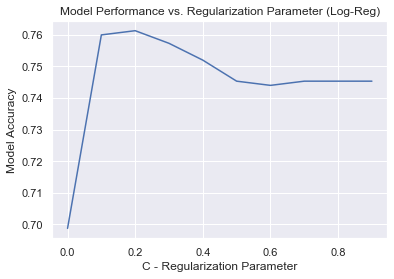

In [43]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
####---- Tuning parameters using GridSearch CV; LOGISTIC Regression ----####
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_logreg = make_pipeline(preprocess, LogisticRegression());
param_grid_logreg = {'logisticregression__C': np.arange(0.00001, 1, 0.1)};
grid = GridSearchCV(pipe_logreg, param_grid_logreg, cv=10);
grid.fit(X_trainval, y_trainval);
print("The best 'C' value for logistic regression fit is: ", grid.best_params_);
print("After Tuning, Logistic Regression Model Accuracy:", grid.score(X_trainval, y_trainval));

plt.plot(np.arange(0.00001, 1, 0.1), grid.cv_results_["mean_test_score"]);
plt.title("Model Performance vs. Regularization Parameter (Log-Reg)");
plt.xlabel("C - Regularization Parameter");
plt.ylabel("Model Accuracy"); plt.show();

#### #### After tuning the hyper parameters for Logistic regression, there is a 7% improvement in the model accuracy using gridsearch.

The best 'C' value for linear SVC training is:  {'linearsvc__C': 0.2001}
After Tuning, Linear SVC Model Accuracy: 0.7933333333333333


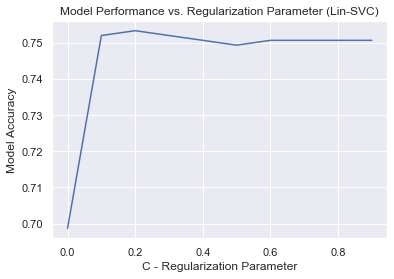

In [44]:
import warnings
warnings.filterwarnings('ignore')
####---- Tuning parameters using GridSearch CV; Linear SVC ----####
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_linSVC = make_pipeline(preprocess, LinearSVC());
# param_grid_linSVC = {'linearsvc__C': np.logspace(-5,5,11)};
param_grid_linSVC = {'linearsvc__C': np.arange(0.0001, 1, 0.1)};
grid = GridSearchCV(pipe_linSVC, param_grid_linSVC, cv=10);
grid.fit(X_trainval, y_trainval);
print("The best 'C' value for linear SVC training is: ", grid.best_params_);
print("After Tuning, Linear SVC Model Accuracy:", grid.score(X_trainval, y_trainval));

plt.plot(np.arange(0.0001, 1, 0.1), grid.cv_results_["mean_test_score"]);
plt.title("Model Performance vs. Regularization Parameter (Lin-SVC)");
plt.xlabel("C - Regularization Parameter");
plt.ylabel("Model Accuracy"); plt.show();

#### After tuning the hyper parameters for Linear SVC, there is again a 7% improvement in the model accuracy using gridsearch.

The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 9}
After Tuning, k-NN classification Model Accuracy: 0.788


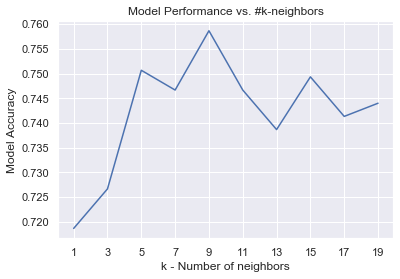

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=10);
grid.fit(X_trainval, y_trainval);
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("After Tuning, k-NN classification Model Accuracy:", grid.score(X_trainval, y_trainval));

plt.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
plt.title("Model Performance vs. #k-neighbors");
plt.xlabel("k - Number of neighbors");
plt.ylabel("Model Accuracy"); plt.xticks(np.arange(1, 21, step=2))
plt.show();

#### After tuning the hyper parameters for k-NN classification, there is a 4% improvement in the model accuracy using gridsearch.

##### (Task 1.5 Inference) For all three models, compared to the model performance in 1.4; the grid search CV outputs are definitely better. It is clear from the results that instead of using default parameters to train and fit the model, using gridsearchCV to figure out the best parameters for evaluation is a better way to fit the models.

In [46]:
### Best Model Accuracy on Testing data ###
### We observed that C=0.2 is the best tuning parameter for Logistic regression above ###
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical))
pipe_StdScale_logReg = make_pipeline(preprocess, LogisticRegression(C=0.2))
pipe_StdScale_logReg.fit(X_trainval, y_trainval);
print("Below is the accuracy for the best model on the testing data set:");
print("Model Accuracy: ", pipe_StdScale_logReg.score(X_test, y_test));

Below is the accuracy for the best model on the testing data set:
Model Accuracy:  0.756


### Task 1.6

#### I have implemented the CV strategy changes exhaustively for only the k-NN model (as it is not mentioned that we need this to analyse for every model). Besides, in my understanding the main idea behind the question is to check/verify if changing the CV data splitting strategies effects the choice of our best hyper paremeters or not (for a particular model) during grid search CV.

This is for default settings:
The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 5}
Training Accuracy is  0.8453333333333334

This is for stratified K-fold but with random seed initiation:
The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 7}
Training Accuracy is  0.8146666666666667

This is for just shuffled K-fold:
The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 5}
Training Accuracy is  0.8453333333333334

This is for shuffled K-fold and with random seed initiation:
The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 5}
Training Accuracy is  0.8453333333333334

This is for default skfold but with new random split for train_test data:
The best 'k' value for k-NN classification is:  {'kneighborsclassifier__n_neighbors': 17}
Training Accuracy is  0.7533333333333333

This is for kfold but with new random split for train_test data:
The best 'k' valu

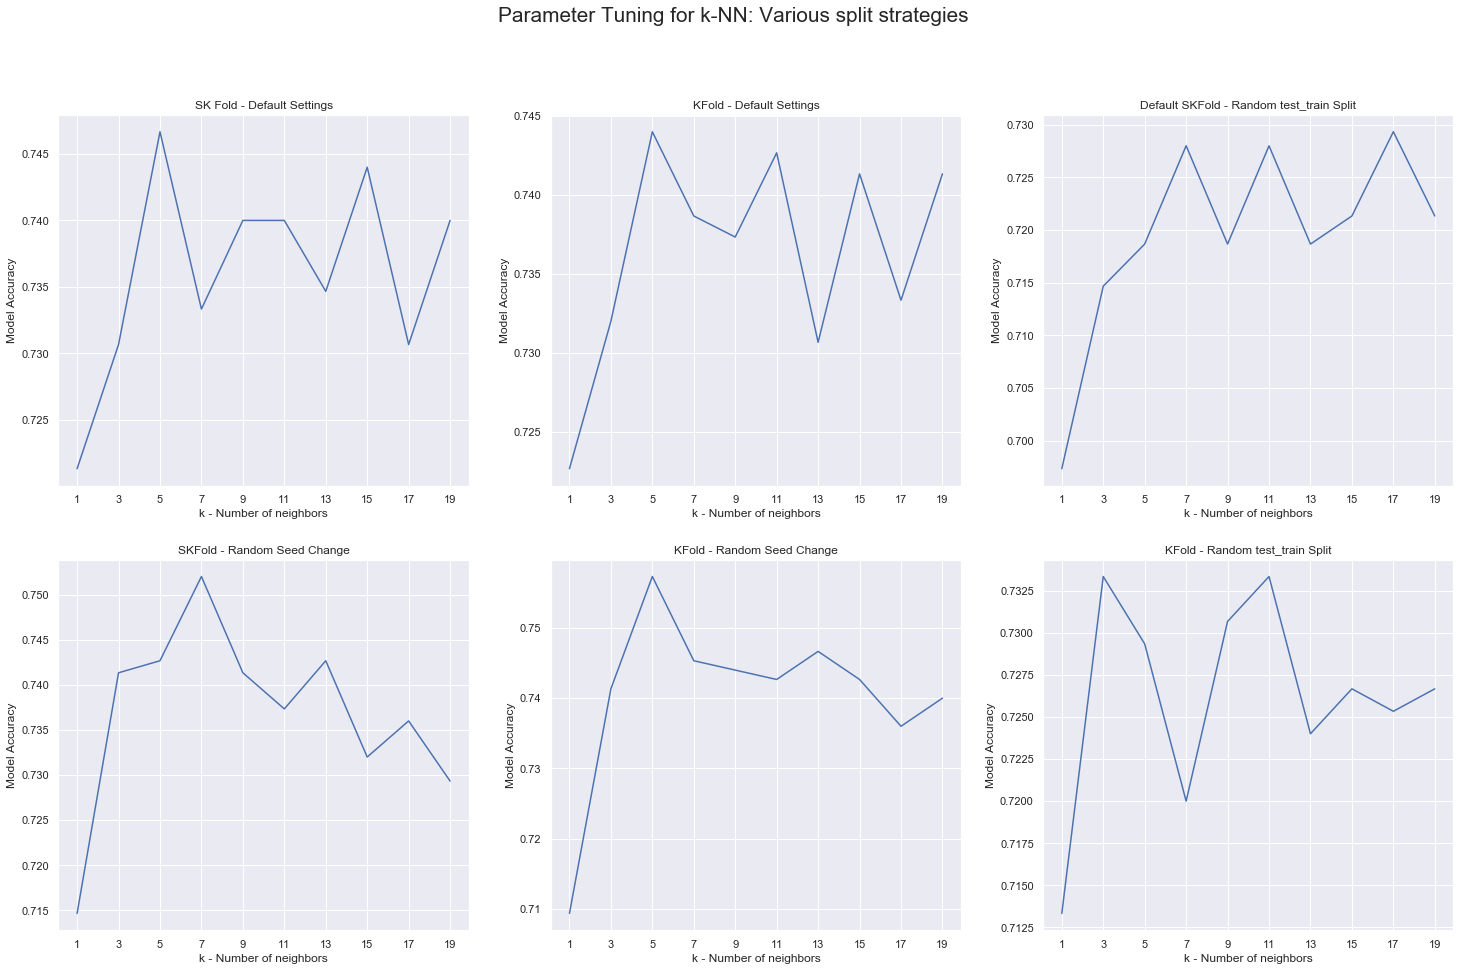

In [47]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

###------ Default Settings (Stratified KFold)-------###
X_trainval, X_test, y_trainval, y_test = train_test_split(X_credit, y_credit, random_state=1);
categorical = X_credit.dtypes == object;
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=5);
grid.fit(X_trainval, y_trainval);
print("This is for default settings:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
fig, axes = plt.subplots(2,3, figsize=(25,15));
ax11, ax12, ax13, ax21, ax22, ax23 = axes.ravel();
fig.suptitle('Parameter Tuning for k-NN: Various split strategies', fontsize = 'xx-large');
ax11.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax11.set_title("SK Fold - Default Settings");
ax11.set_xlabel("k - Number of neighbors");
ax11.set_ylabel("Model Accuracy"); 
ax11.set_xticks(np.arange(1, 21, step=2));

###------ Stratified KFold but with random seed shuffle-------###
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=6)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=skfold);
grid.fit(X_trainval, y_trainval);
print('\n'"This is for stratified K-fold but with random seed initiation:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
ax21.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax21.set_title("SKFold - Random Seed Change");
ax21.set_xlabel("k - Number of neighbors");
ax21.set_ylabel("Model Accuracy"); 
ax21.set_xticks(np.arange(1, 21, step=2));

###------ Shuffled KFold (No seed initiation) -------###
kfold = KFold(n_splits=5, shuffle=True)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=kfold);
grid.fit(X_trainval, y_trainval);
print('\n'"This is for just shuffled K-fold:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
ax12.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax12.set_title("KFold - Default Settings");
ax12.set_xlabel("k - Number of neighbors");
ax12.set_ylabel("Model Accuracy"); ax12.set_xticks(np.arange(1, 21, step=2));

###------ Shuffled KFold (With Random Seed initiation) -------###
kfold = KFold(n_splits=5, shuffle=True, random_state= 10)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=kfold);
grid.fit(X_trainval, y_trainval);
print('\n'"This is for shuffled K-fold and with random seed initiation:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
ax22.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax22.set_title("KFold - Random Seed Change");
ax22.set_xlabel("k - Number of neighbors");
ax22.set_ylabel("Model Accuracy"); 
ax22.set_xticks(np.arange(1, 21, step=2));

###------ Default skfold - Random train_test split given -------###
X_trainval, X_test, y_trainval, y_test = train_test_split(X_credit, y_credit, random_state=10);
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=5);
grid.fit(X_trainval, y_trainval);
print('\n'"This is for default skfold but with new random split for train_test data:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
ax13.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax13.set_title("Default SKFold - Random test_train Split");
ax13.set_xlabel("k - Number of neighbors");
ax13.set_ylabel("Model Accuracy"); 
ax13.set_xticks(np.arange(1, 21, step=2));

###------ Shuffled kfold - Random train_test split given -------###
kfold = KFold(n_splits=5, shuffle=True)
preprocess = make_column_transformer((OneHotEncoder(), categorical), (StandardScaler(), ~categorical));
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier());
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,21,2)};
grid = GridSearchCV(pipe_knn, param_grid_knn, cv=kfold);
grid.fit(X_trainval, y_trainval);
print('\n'"This is for kfold but with new random split for train_test data:")
print("The best 'k' value for k-NN classification is: ", grid.best_params_);
print("Training Accuracy is ", grid.score(X_trainval, y_trainval));
ax23.plot(np.arange(1,21,2), grid.cv_results_["mean_test_score"]);
ax23.set_title("KFold - Random test_train Split");
ax23.set_xlabel("k - Number of neighbors");
ax23.set_ylabel("Model Accuracy"); 
ax23.set_xticks(np.arange(1, 21, step=2));

##### The model performance is varying considerably with changing random seeds/states and using different cross validation splitting strategies. The above graphs clearly show that changing the random state for shuffling and for test_train split definitely effects the parameters that best fit the classification model. For example, with 6 cases above, I am observing that there are 5 different values of 'k' neighbors that give the best accuracy. This clearly tells us that randomness in splitting and shuffling the data effects the tuning of the parameters for the model.
##### In particular, we can see a difference of 10% in model accuracy between the best (85% for cases 1 & 3) and the worst accuracies (75% for case 6). So, the conclusion is that the changes in cross validation strategies effect the model performance in general.

### Task 1.7

In [48]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_credit, y_credit, random_state=1)
categorical = X_trainval.dtypes == object
ct = make_column_transformer((StandardScaler(), ~categorical))
abc = ct.fit_transform(X_trainval)
abc = pd.DataFrame(abc, columns=["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"])
X_trainval = pd.get_dummies(X_trainval);
X_trainval = X_trainval.reset_index();
X_trainval = X_trainval.drop("index", axis=1)
X_trainval[["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"]] = abc

In [49]:
logreg = LogisticRegression(C=0.1).fit(X_trainval, y_trainval)
print("Logistic Regression Accuracy:", logreg.score(X_trainval, y_trainval))
col_names = list(X_trainval.columns)

Logistic Regression Accuracy: 0.7906666666666666


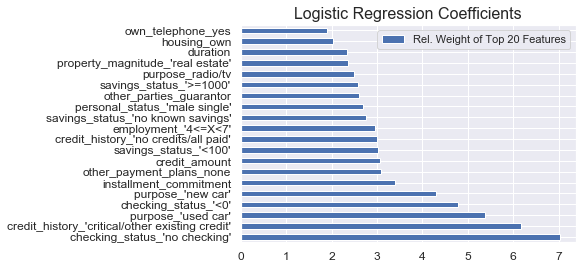

In [50]:
feat_imp = abs(logreg.coef_[0]);
feat_imp = 100*feat_imp/feat_imp.sum()
feat_imp = pd.DataFrame(feat_imp, index=col_names)
feat_imp = pd.DataFrame(feat_imp.transpose())
feat_imp = feat_imp.sort_values(by = 0, axis = 1, ascending = False)
feat_imp = pd.DataFrame(feat_imp.transpose()); 
feat_imp.columns = ["Rel. Weight of Top 20 Features"]
feat_imp = feat_imp.head(20);
feat_imp.plot.barh(fontsize=12);
plt.title("Logistic Regression Coefficients", fontsize=16);

In [51]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_credit, y_credit, random_state=1)
categorical = X_trainval.dtypes == object
ct = make_column_transformer((StandardScaler(), ~categorical))
abc = ct.fit_transform(X_trainval)
abc = pd.DataFrame(abc, columns=["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"])
X_trainval = pd.get_dummies(X_trainval);
X_trainval = X_trainval.reset_index();
X_trainval = X_trainval.drop("index", axis=1)
X_trainval[["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"]] = abc

In [52]:
linSVC = LinearSVC(C=0.2).fit(X_trainval, y_trainval)
print("Linear SVC Accuracy:", linSVC.score(X_trainval, y_trainval))
col_names = list(X_trainval.columns)

Linear SVC Accuracy: 0.7933333333333333


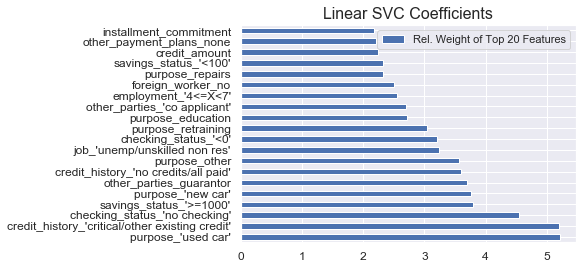

In [54]:
feat_imp = abs(linSVC.coef_[0]);
feat_imp = 100*feat_imp/feat_imp.sum()
feat_imp = pd.DataFrame(feat_imp, index=col_names)
feat_imp = pd.DataFrame(feat_imp.transpose())
feat_imp = feat_imp.sort_values(by = 0, axis = 1, ascending = False)
feat_imp = pd.DataFrame(feat_imp.transpose()); 
feat_imp.columns = ["Rel. Weight of Top 20 Features"]
feat_imp = feat_imp.head(20)
feat_imp.plot.barh(fontsize=12);
plt.title("Linear SVC Coefficients", fontsize=16);

#### (Inference - Task 1.7): Overall, in between both the models, out of the top 20 most important coefficients ~14 of them are common in both of them. The top 20 out of the 61 coefficients in my model have a cumulative weight of 70%. Features like 'checking_status', 'credit_history' and 'purpose' for loan application are weighed more in both the models. Overall, a large portion of the top features identified in both the models are common.